In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
poke = pd.read_csv('Pokemon.csv')
poke.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [36]:
poke['Legendary'].value_counts()

False    735
True      65
Name: Legendary, dtype: int64

--- 0.021446943283081055 seconds ---


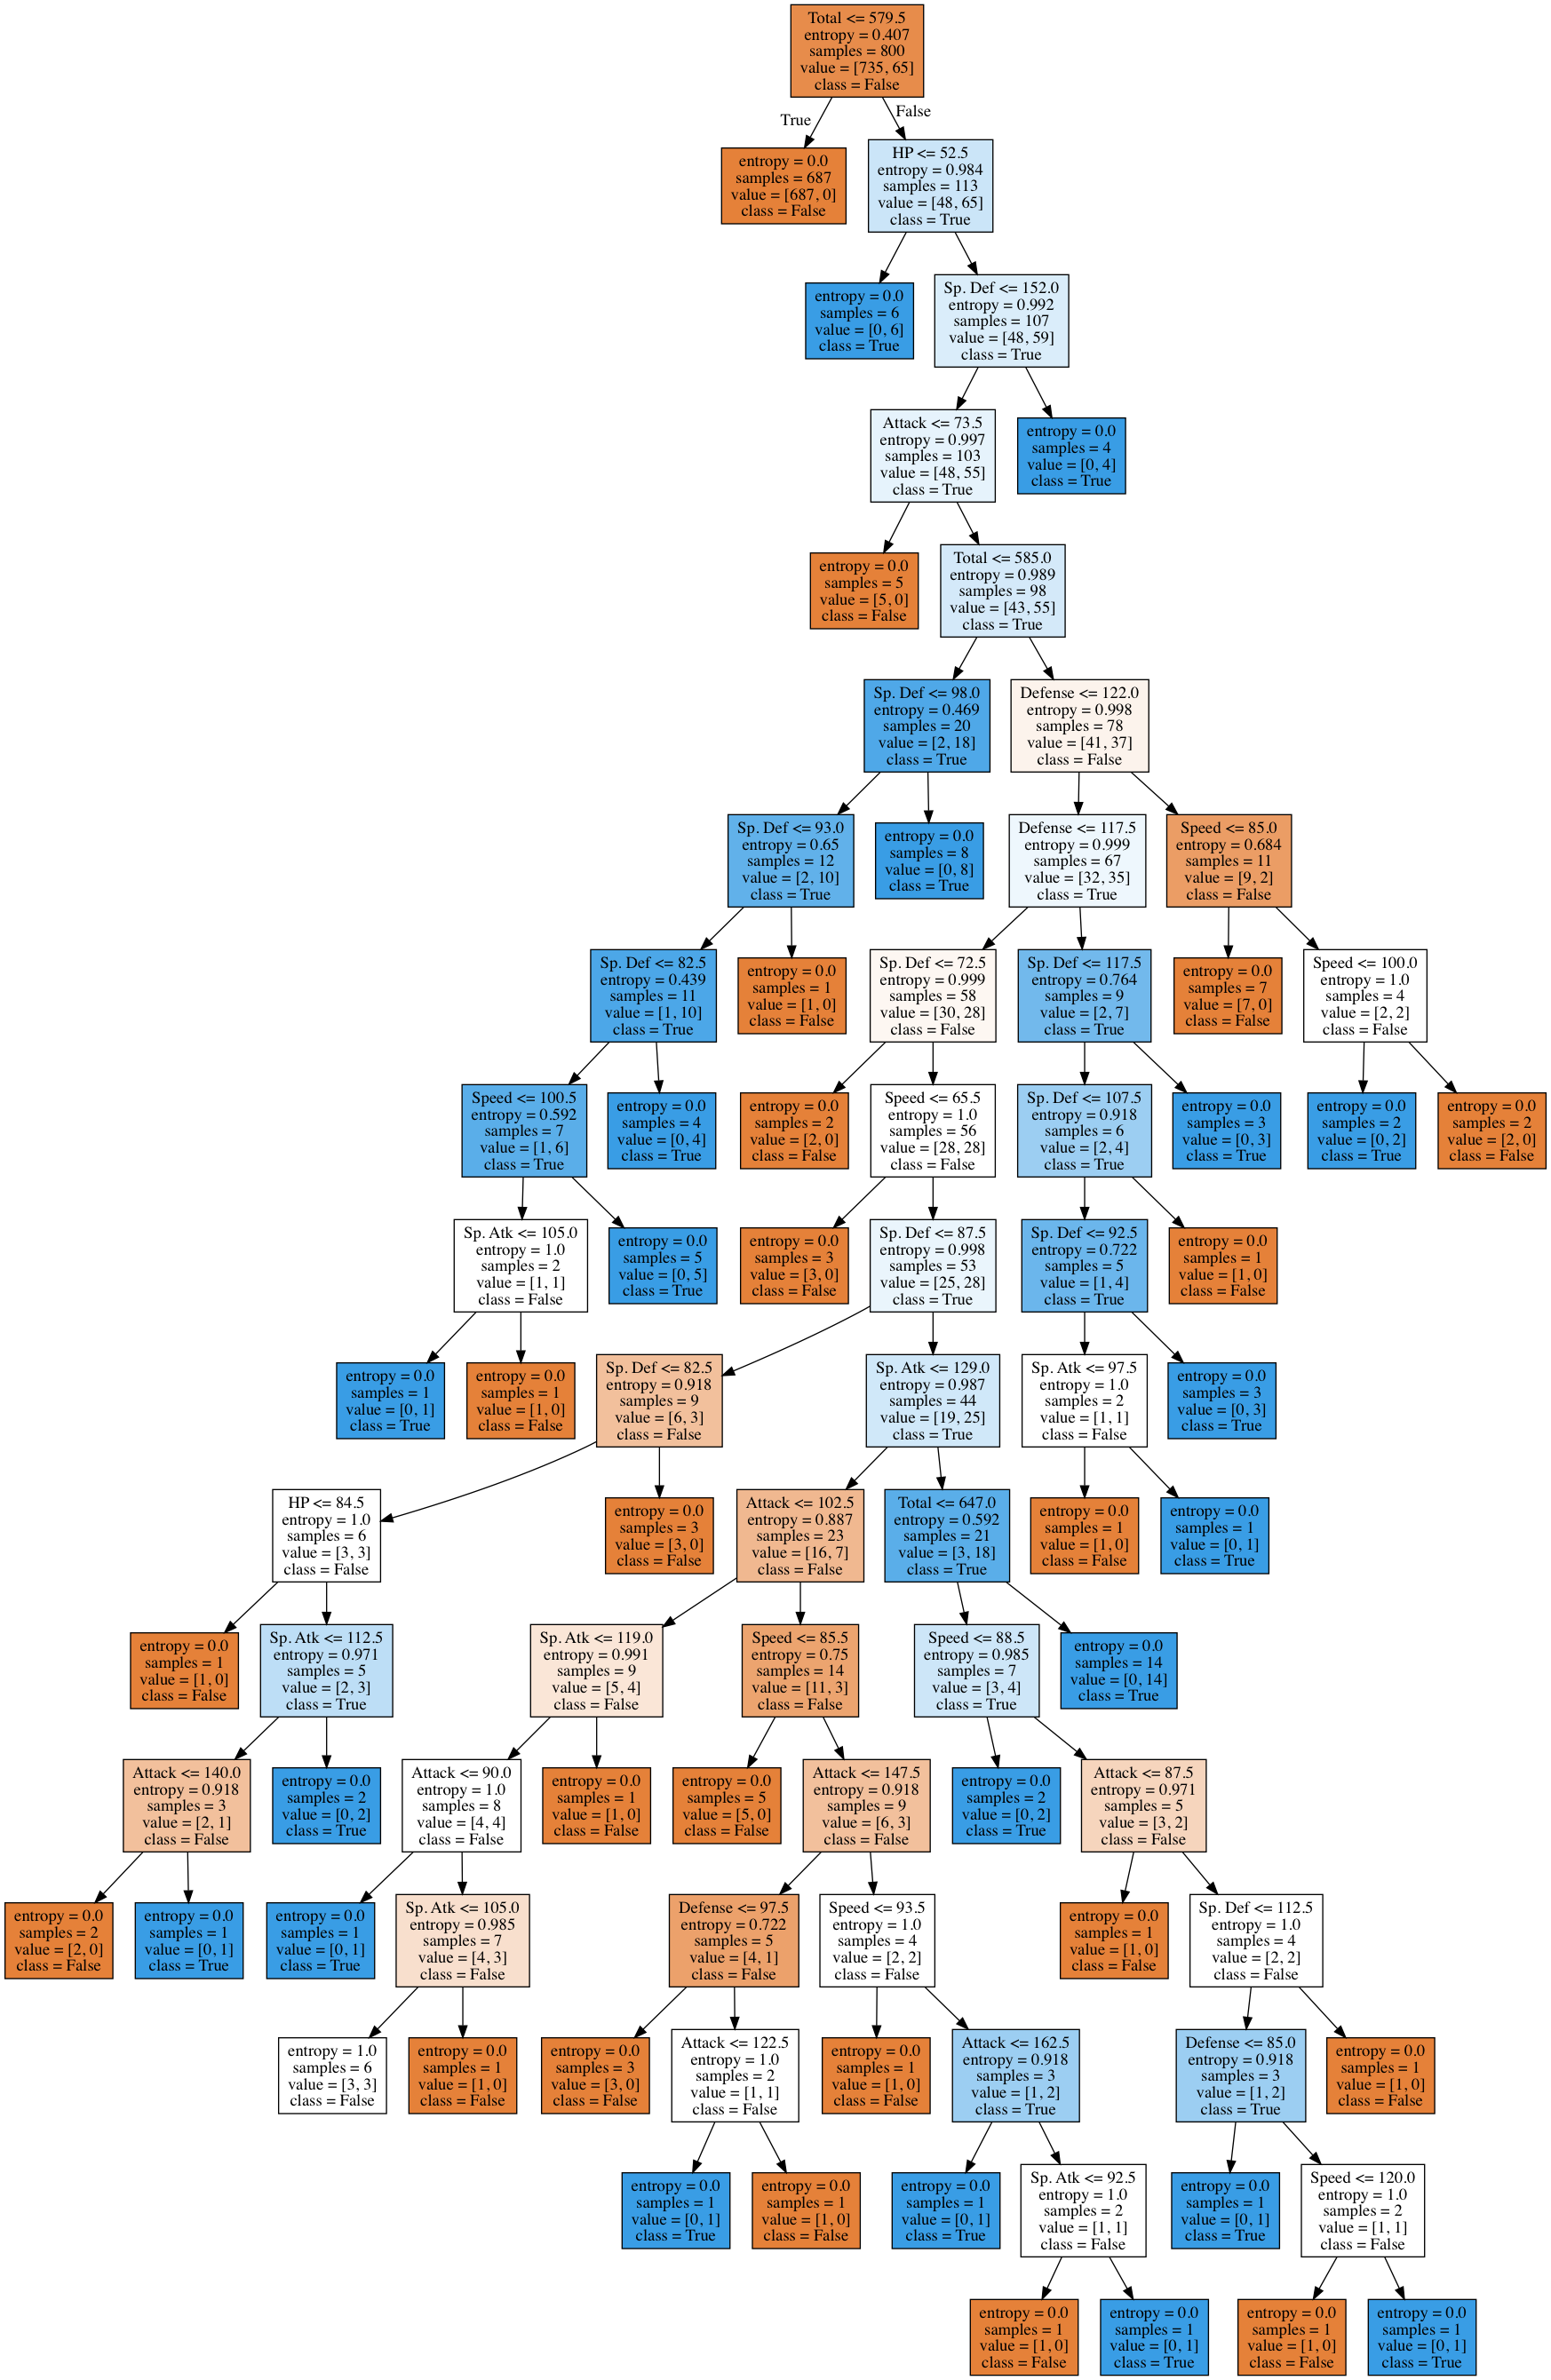

In [50]:
from sklearn import tree
from IPython.display import Image

import pydotplus
import graphviz
import time

X = poke[['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']]
Y = poke['Legendary']

start_time = time.time()
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=1
)
decision_tree.fit(X, Y)

dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=X.columns,
    class_names=['False', 'True'],
    filled=True
)
print("--- %s seconds ---" % (time.time() - start_time))
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [49]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

start_time = time.time()
rfc = ensemble.RandomForestClassifier()
print(cross_val_score(rfc, X, Y, cv=10))
print("--- %s seconds ---" % (time.time() - start_time))

[0.95061728 0.95061728 0.95061728 0.95061728 0.95061728 0.91139241
 0.93670886 0.98734177 0.92405063 0.94936709]
--- 0.172529935836792 seconds ---
